## Seaborn

In [63]:
! pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("libros.csv")
df.head()

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller
0,Libro 29,Ciencia,10.93,3.4,209,2023-01-02,0
1,Libro 35,Historia,5.28,4.8,252,2023-01-09,1
2,Libro 33,Ciencia,12.90,3.2,373,2023-02-06,1
3,Libro 15,Ciencia,12.90,4.1,51,2023-02-08,1
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1


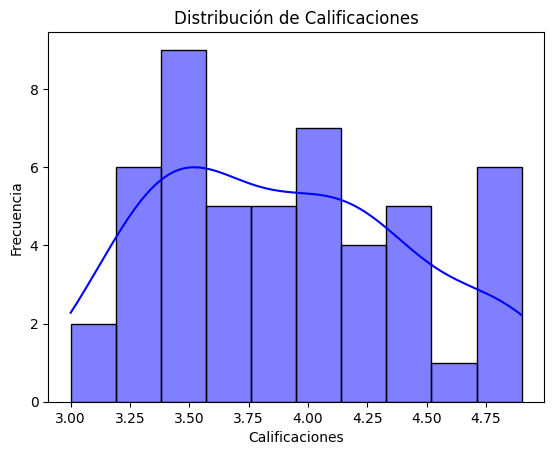

In [70]:
sns.histplot(
    # data=df,
    x=df["calificacion"],
    bins=10,
    kde=True,
    color="blue"
)

plt.title("Distribución de Calificaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")

plt.show()

### Atributos compartidos por muchas de las clases de gráficos en Seaborn

**Contar con atributos compartidos hace más simple la creación de gráficos que con Matplotlib**

- data: común en casi todos los gráficos de Seaborn. Especifica el df que contiene los datos a visualizar.

- x, y: se utilizan para definir las variables que se mapean a los ejes. En gráficos como el histplot, generalmente se usa solo x o y.

- color: controla el color principal del gráfico y es un argumento común en la mayoría de los gráficos de Seaborn, permitiendo personalizar la apariencia de la visualización.

- bins: aunque es específico de los histogramas, conceptos similares aparecen en otros gráficos, como el tamaño de los "steps" en sns.kdeplot o la anchura de las bandas en sns.boxplot.

- kde: mientras que en histplot se usa para añadir una estimación de densidad kernel sobre el histograma, en otros contextos como sns.kdeplot, es el foco principal del gráfico.

### Gráficos para representar relaciones entre las variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titulo        50 non-null     object 
 1   categoria     50 non-null     object 
 2   precio        50 non-null     float64
 3   calificacion  50 non-null     float64
 4   ventas        50 non-null     int64  
 5   fecha_venta   50 non-null     object 
 6   bestseller    50 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


In [6]:
df.head()

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller
0,Libro 29,Ciencia,10.93,3.4,209,2023-01-02,0
1,Libro 35,Historia,5.28,4.8,252,2023-01-09,1
2,Libro 33,Ciencia,12.90,3.2,373,2023-02-06,1
3,Libro 15,Ciencia,12.90,4.1,51,2023-02-08,1
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1


In [7]:
title_styles = {
    "fontname": "cursive", # cursive, monospace, serif, sans-serif, Arial, Comic Sans MS, Courier New, Georgia, Verdana
    "fontsize": 20,
    "color": "gray",
    "weight": 100 # Define la definición del Titulo
}

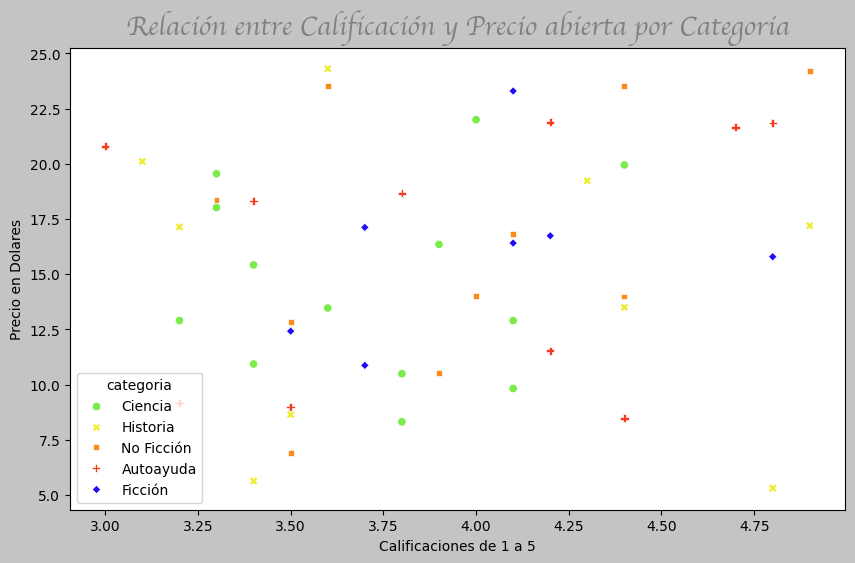

In [73]:
# Scatter Plot (Gráfico de dispersion entre calificón y precio)
plt.figure(
    figsize=(10,6),
    facecolor="#C3C4C4", # Color de relleno de la figura
    edgecolor="white" # Color del borde de la figura
)

sns.scatterplot(
    data=df,
    x="calificacion",
    y="precio",
    hue="categoria",
    style="categoria"
)

title_styles = {
    "fontname": "cursive", # cursive, monospace, serif, sans-serif, Arial, Comic Sans MS, Courier New, Georgia, Verdana
    "fontsize": 20,
    "color": "gray",
    "weight": 100 # Define la definición del Titulo
}

plt.title(
    label="Relación entre Calificación y Precio abierta por Categoria",
    loc="center", # El default es "center". 
    pad=10,
    fontdict=title_styles # type: ignore
)

plt.xlabel("Calificaciones de 1 a 5")
plt.ylabel("Precio en Dolares")

plt.show()

In [75]:
# Preparo datos para un LinePlot
df["fecha_venta"] = pd.to_datetime(df["fecha_venta"])
df["mes"] = df["fecha_venta"].dt.month

df_ventas_mes = df.groupby("mes")["ventas"].sum().reset_index()
df_ventas_mes

,mes,ventas
0,1,461
1,2,845
2,3,556
3,4,1757
4,5,2906
5,6,1109
6,7,964
7,8,233
8,9,2264
9,10,825


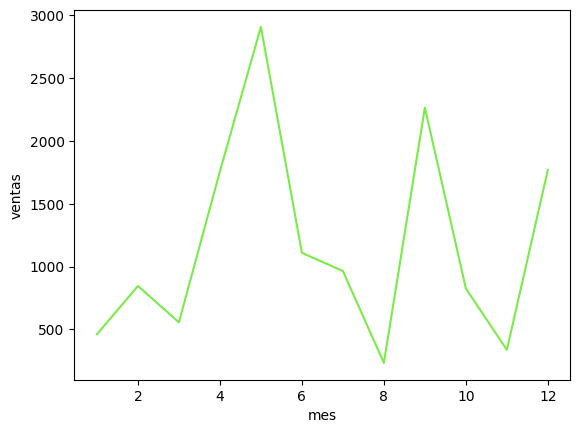

In [76]:
# Lineplot (Gráfico de Linea) sin personalizaciones
sns.lineplot(
    data=df_ventas_mes,
    x="mes",
    y="ventas"
)

plt.show()

### FacetGrid

- FacetGrid es una gran herramienta en Seaborn diseñada para crear matrices de gráficos basadas en el agrupamiento por una o más variables categóricas, esto es gracias a una clase específica de Seaborn donde se visualiza esta distribución. FacetGrid permite examinar cómo se distribuyen las variables numéricas dentro de estos subconjuntos de datos, facilitando una comprensión más profunda de las relaciones y tendencias dentro del conjunto de datos.

- Con FacetGrid, se pueden comparar fácilmente estas distribuciones y observar diferencias significativas en la estrategia de precios entre diferentes segmentos.

In [11]:
df.head()

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller,mes
0,Libro 29,Ciencia,10.93,3.4,209,2023-01-02,0,1
1,Libro 35,Historia,5.28,4.8,252,2023-01-09,1,1
2,Libro 33,Ciencia,12.90,3.2,373,2023-02-06,1,2
3,Libro 15,Ciencia,12.90,4.1,51,2023-02-08,1,2
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1,2


In [88]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x: 'ArrayLike | Sequence[ArrayLike]', notch: 'bool | None' = None, sym: 'str | None' = None, vert: 'bool | None' = None, whis: 'float | tuple[float, float] | None' = None, positions: 'ArrayLike | None' = None, widths: 'float | ArrayLike | None' = None, patch_artist: 'bool | None' = None, bootstrap: 'int | None' = None, usermedians: 'ArrayLike | None' = None, conf_intervals: 'ArrayLike | None' = None, meanline: 'bool | None' = None, showmeans: 'bool | None' = None, showcaps: 'bool | None' = None, showbox: 'bool | None' = None, showfliers: 'bool | None' = None, boxprops: 'dict[str, Any] | None' = None, tick_labels: 'Sequence[str] | None' = None, flierprops: 'dict[str, Any] | None' = None, medianprops: 'dict[str, Any] | None' = None, meanprops: 'dict[str, Any] | None' = None, capprops: 'dict[str, Any] | None' = None, whiskerprops: 'dict[str, Any] | None' = None, manage_ticks: 'bool' = True, autorange: 'bool' = False, zorder: '

/Users/mgobea/Documents/Henry/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


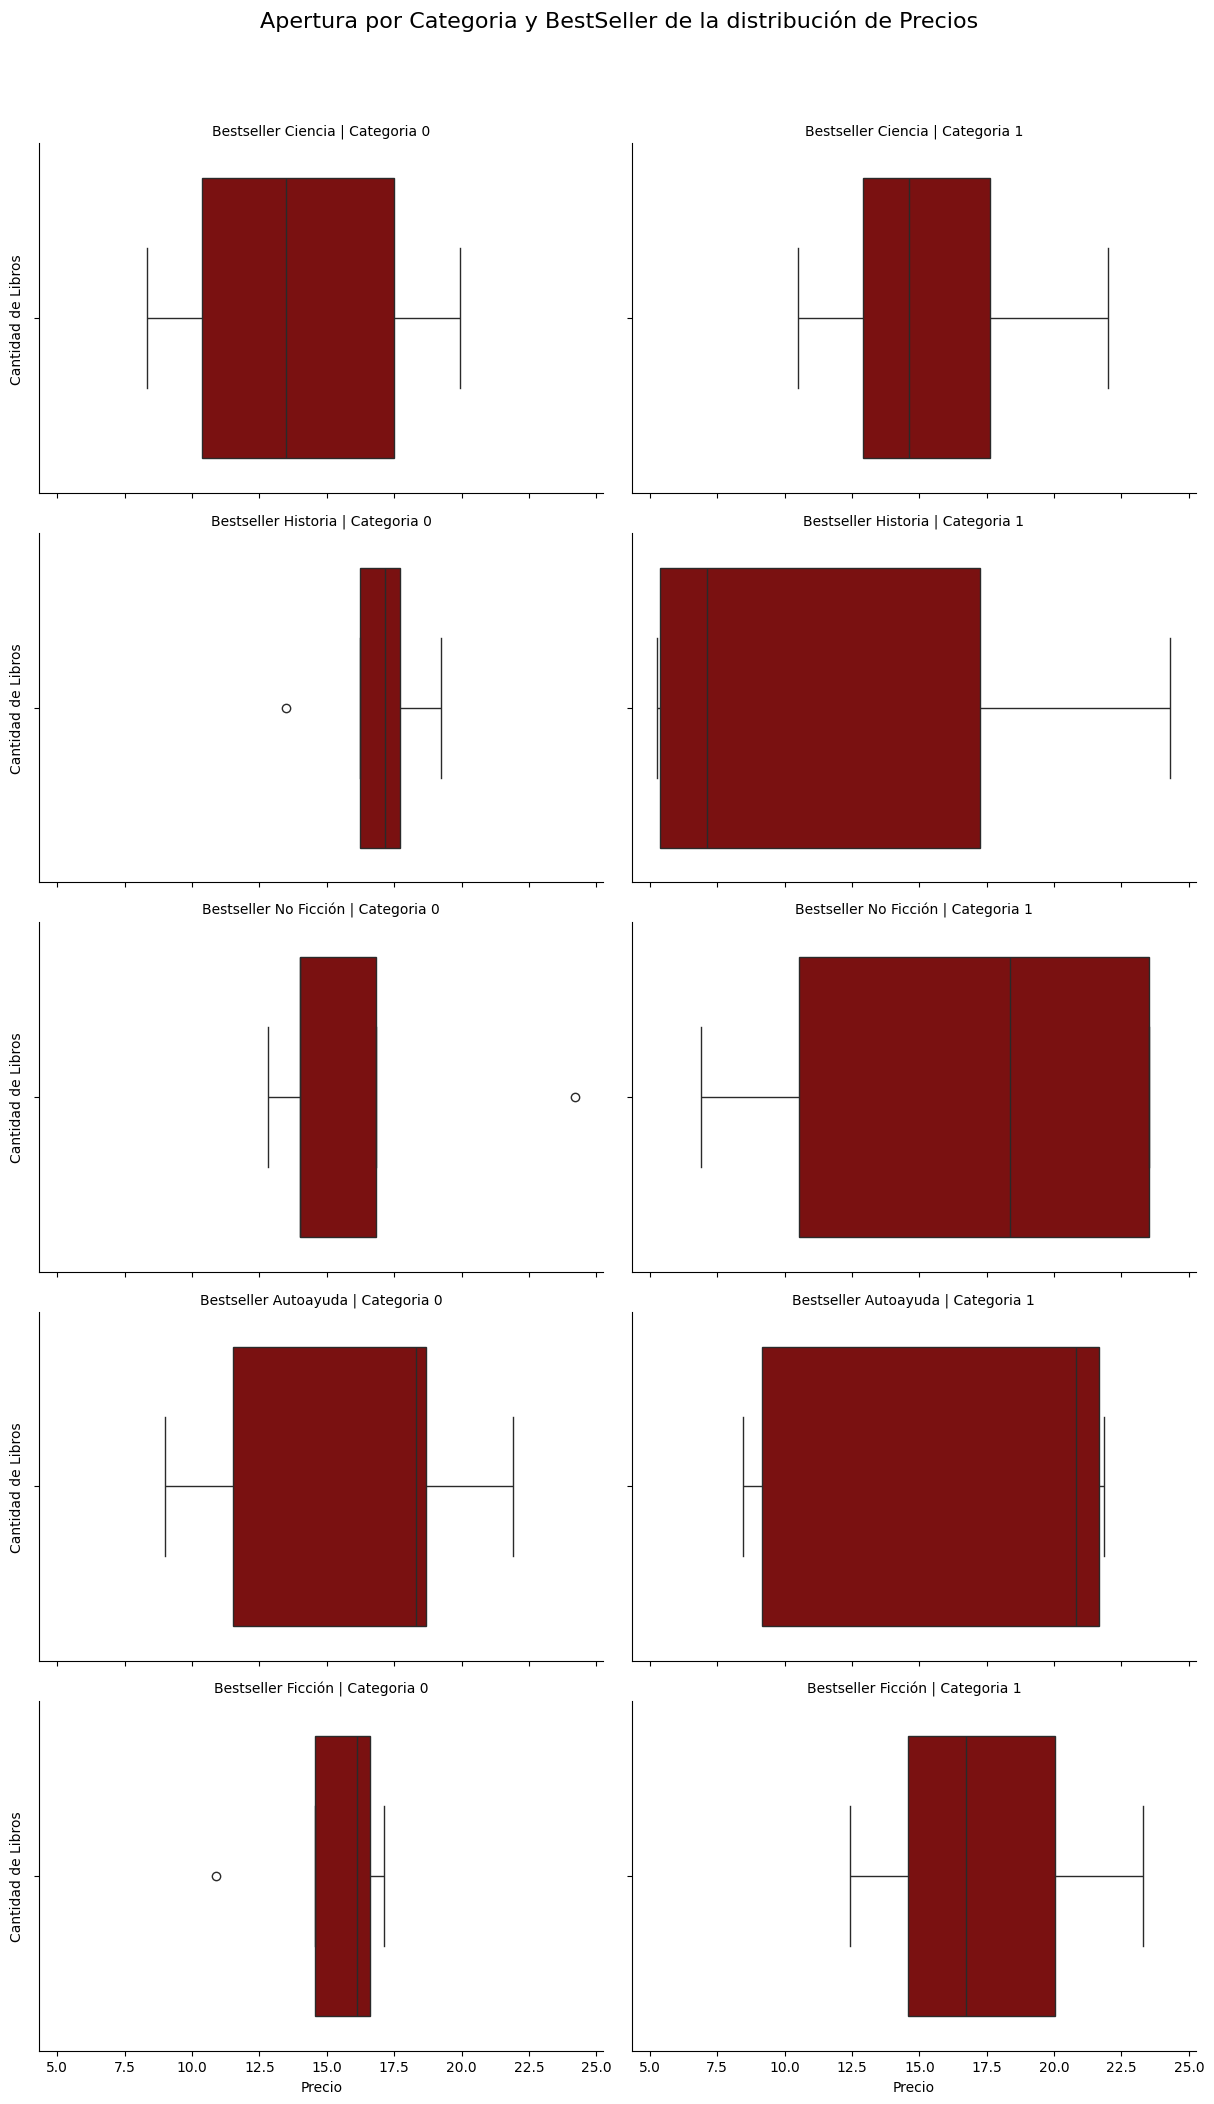

In [91]:
# Creo el objeto FacetGrid
grid = sns.FacetGrid(
    data=df,
    row="categoria",
    col="bestseller",
    margin_titles=False,
    despine=True, # False mantiene los 4 bordes de los subplots
    height=4, # Altura del subplot
    aspect=1.5 # Relación de aspecto altura por anchura
)

# Mapeo un tipo de gráfico a cada subplot
grid.map(
    sns.boxplot,
    "precio",
    color="darkred",
    # bins=5
)

# Establecer etiquetas de ejes y títulos de subplots
grid.set_axis_labels("Precio", "Cantidad de Libros")
grid.set_titles(col_template="Categoria {col_name}", row_template="Bestseller {row_name}")

# Ajustar el espaciado para el suptitle
# plt.subplots_adjust(top=0.9) Forma alternativa de que el suptitle no se pise sin usar y= en suptitle

# Añadir el suptitle
grid.figure.suptitle("Apertura por Categoria y BestSeller de la distribución de Precios", size=16, y=1.05)

plt.show()

### Distribuciones y categorias de datos

**Ayudan a visualizar y entender las distribuciones de los datos**

- Histogramas
- Diagramas de Caja
- Gráficos de violín

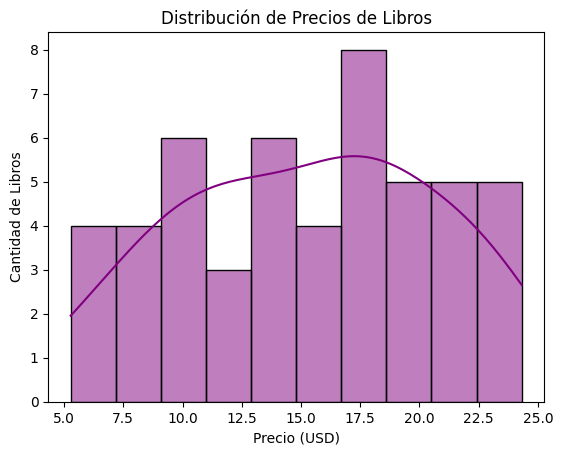

In [92]:
# Histograma

sns.histplot(
    data=df,
    x="precio",
    bins=5,
    kde=True,
    color="purple"
)

plt.title("Distribución de Precios de Libros")
plt.xlabel("Precio (USD)")
plt.ylabel("Cantidad de Libros")

plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   titulo        50 non-null     object        
 1   categoria     50 non-null     object        
 2   precio        50 non-null     float64       
 3   calificacion  50 non-null     float64       
 4   ventas        50 non-null     int64         
 5   fecha_venta   50 non-null     datetime64[ns]
 6   bestseller    50 non-null     int64         
 7   mes           50 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 3.1+ KB


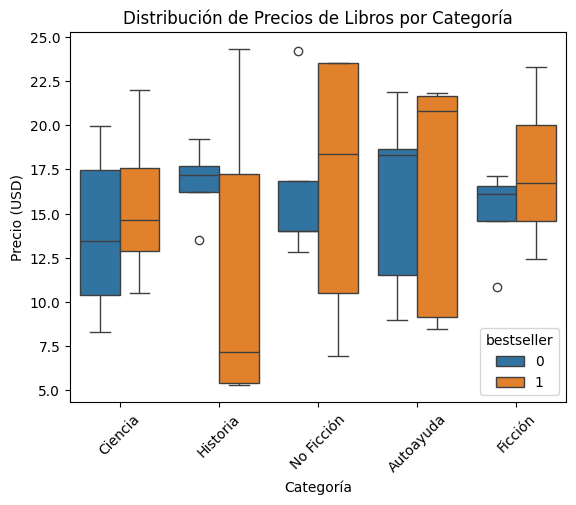

In [15]:
# Diagrama de Caja

sns.boxplot(
    data=df,
    x="categoria",
    y="precio",
    hue="bestseller",
    # notch=True
)

plt.title("Distribución de Precios de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)

plt.show()

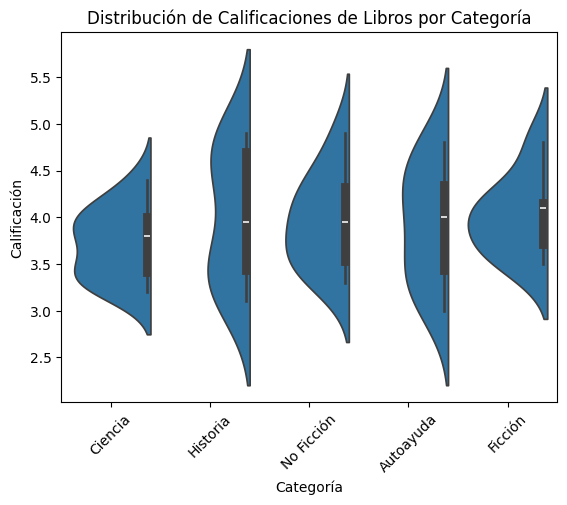

In [16]:
# Gráfico de Violin o Boxplot Mejorado: Suma densidad lo que permite obtener un histograma junto con boxplot

sns.violinplot(
    data=df,
    x="categoria",
    y="calificacion",
    inner="box", # box, quartile, point, stick, None
    split=True,
    cut=2 # 2 es el valor por default
)

plt.title("Distribución de Calificaciones de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Calificación")
plt.xticks(rotation=45)

plt.show()

### Análisis multivariable y gráficos estadísticos

**Explorar las relaciones y patrones en datos que involucran múltiples variables puede ser bastante complejo, pero gracias a las técnicas de visualización avanzadas, podemos obtener insights valiosos sobre cómo las variables interactúan entre sí. Vamos a profundizar en cómo los Pairplots, Heatmaps y Clustermaps pueden ser utilizados en el análisis multivariable, utilizando el caso de Librería Insights para ilustrar su aplicación.**

- Pairplots
- Heatmaps
- Clustermaps

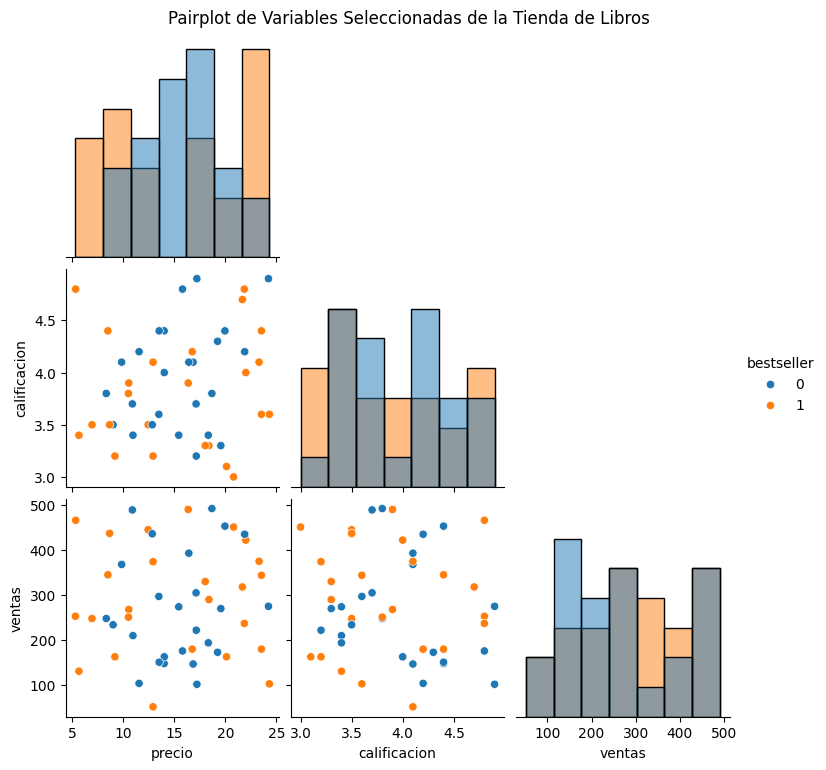

In [17]:
# Pairplot: Pairplot crea una matriz de gráficos para visualizar las relaciones entre múltiples variables a la vez, lo que es excelente para un análisis exploratorio inicial.

sns.pairplot(
    data= df[["precio","calificacion","ventas","bestseller"]],
    hue="bestseller",
    corner=True, # Evita duplicación de charts para mejor lectura
    diag_kind="hist", # auto, hist, kde, None
    kind="scatter" # scatter, kde
)

plt.suptitle("Pairplot de Variables Seleccionadas de la Tienda de Libros", y=1.02)

plt.show()

- Donde se cruzan las mismas variables se gráfica un histograma, un kde (densidad de kernel) o nada. 
- Donde se cruzan variables númericas distintas se gráfica un ScatterPlot o Gráfico de Densidad de Kernel (kde)

In [18]:
sns.cubehelix_palette()

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [19]:
sns.dark_palette(color="red")

[(np.float64(0.19218232522148992),
  np.float64(0.13308584448917626),
  np.float64(0.13306098410197983)),
 (np.float64(0.35374586017719195),
  np.float64(0.10646867559134102),
  np.float64(0.10644878728158387)),
 (np.float64(0.515309395132894),
  np.float64(0.07985150669350576),
  np.float64(0.0798365904611879)),
 (np.float64(0.676872930088596),
  np.float64(0.05323433779567051),
  np.float64(0.05322439364079194)),
 (np.float64(0.838436465044298),
  np.float64(0.026617168897835247),
  np.float64(0.026612196820395964)),
 (np.float64(1.0), np.float64(0.0), np.float64(0.0))]

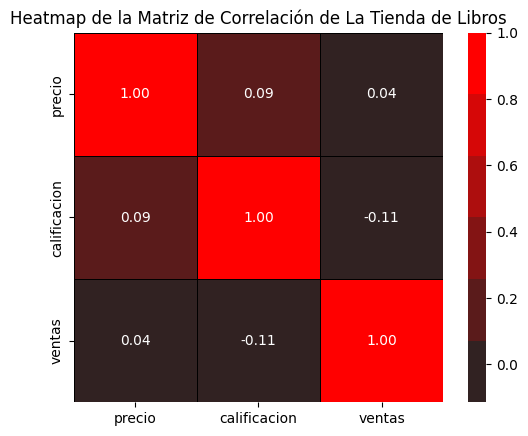

In [20]:
# Heatmap o Mapa de Calor: En el análisis de datos, los Heatmaps son especialmente útiles para visualizar correlaciones entre variables, donde cada celda en la matriz muestra el coeficiente de correlación entre dos variables, mostrando la fuerza de la relación entre estas.

sns.heatmap(
    data=df[["precio","calificacion","ventas"]].corr(),
    annot=True,
    cmap=sns.dark_palette(color="red"), # coolwarm viridis plasma. Buscar el más apropiado usando sns. y luego escribiendo palette aparecen todas las opciones.
    linewidths=.5,
    linecolor="black",
    fmt=".2f",
    square=True,
    robust=False, # Excluye outliers de la gama de colores
    # center=0,
    # mask=np.array([[False, True, True],[False, False, True],[False, False, False]]), # Oculta una parte de la matriz
)

plt.title("Heatmap de la Matriz de Correlación de La Tienda de Libros")

plt.show()

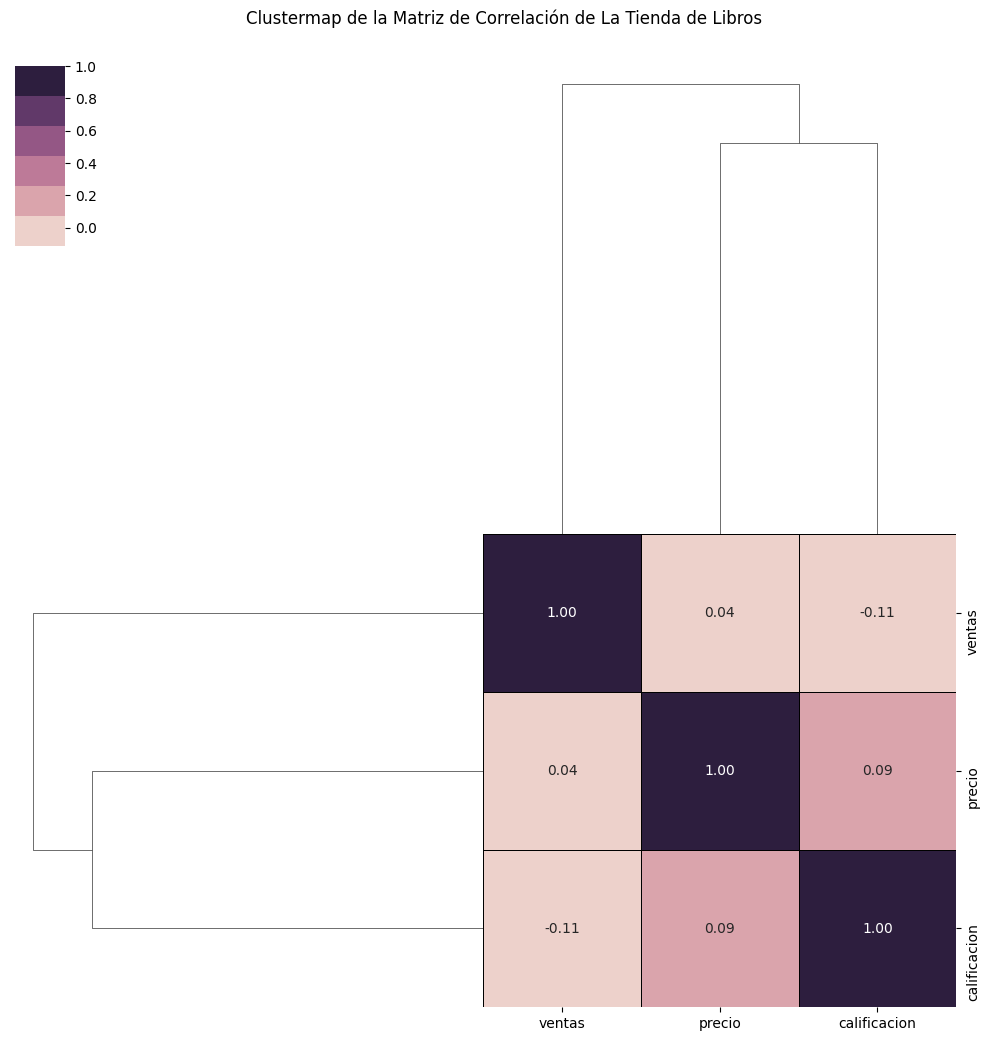

In [32]:
# Clustermap: combina la visualización de heatmap con métodos de clustering jerárquico, agrupando variables o muestras que tienen patrones similares. 

sns.clustermap(
    data=df[["precio","calificacion","ventas"]].corr(),
    annot=True,
    cmap=sns.cubehelix_palette(), # coolwarm viridis plasma. Buscar el más apropiado usando sns. y luego escribiendo palette aparecen todas las opciones.
    linewidths=.5,
    linecolor="black",
    fmt=".2f",
    method="complete", # Afecta como se calculan las distancias entre los clusters. Otras opciones: single, average
    metric="cityblock", # Define la métrica de distancia entre un cluster y otro. Otras opciones: cityblock, 
    dendrogram_ratio=0.5,
)

plt.title(
    label="                                            Clustermap de la Matriz de Correlación de La Tienda de Libros",
    loc="left",
    pad=30 # Es el espacio que queda debajo entre el titulo y el clustermap.
)

plt.show()

# Notamos rapidamente, gracias al dendograma agregado por el Clustermap que precio y calificación correlacionan mejor que precio y ventas por ejemplo



### Visualizaciones avanzadas

- custom palettes. Podemos extraer los colores que queramos de acá por ejemplo: https://htmlcolorcodes.com/es/
- 

In [35]:
df.head()

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller,mes
0,Libro 29,Ciencia,10.93,3.4,209,2023-01-02,0,1
1,Libro 35,Historia,5.28,4.8,252,2023-01-09,1,1
2,Libro 33,Ciencia,12.90,3.2,373,2023-02-06,1,2
3,Libro 15,Ciencia,12.90,4.1,51,2023-02-08,1,2
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1,2


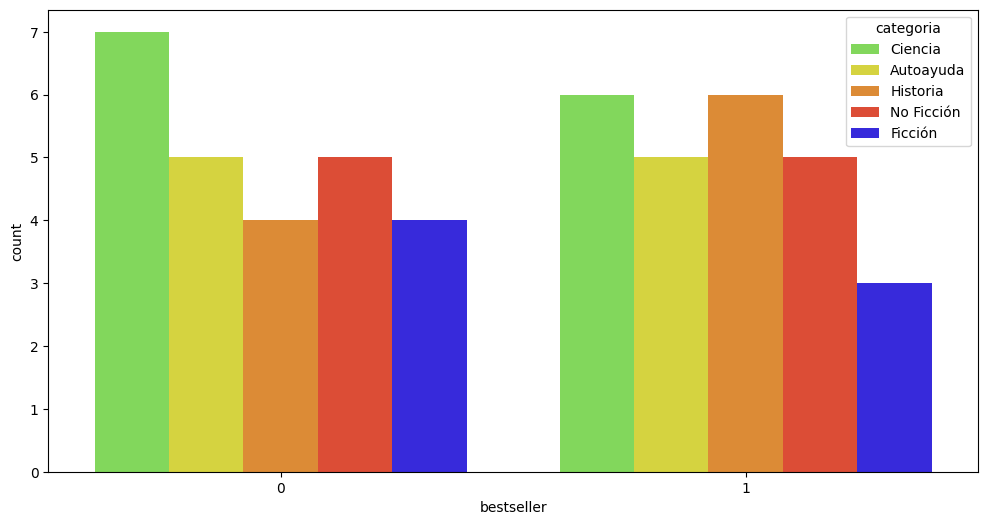

In [37]:
custom_palette = ["#7AEB48","#EEEB27","#F78C1B","#F7391B","#1E0CF9","#0EF9F9"]
sns.set_palette(custom_palette)

plt.figure(
    figsize=(12,6)
)

sns.countplot(
    data=df,
    x="bestseller",
    hue="categoria"
)

plt.show()

In [39]:
sns.dark_palette(color="green")

[(np.float64(0.13211029424631615),
  np.float64(0.15348624836493982),
  np.float64(0.13209326518836165)),
 (np.float64(0.10568823539705292),
  np.float64(0.22318115555469695),
  np.float64(0.10567461215068932)),
 (np.float64(0.0792661765477897),
  np.float64(0.2928760627444541),
  np.float64(0.07925595911301699)),
 (np.float64(0.05284411769852647),
  np.float64(0.36257096993421123),
  np.float64(0.05283730607534466)),
 (np.float64(0.026422058849263227),
  np.float64(0.43226587712396836),
  np.float64(0.026418653037672324)),
 (np.float64(0.0), np.float64(0.5019607843137255), np.float64(0.0))]

### Subplots de Matplotlib rellenos de gráficos de Seaborn! 

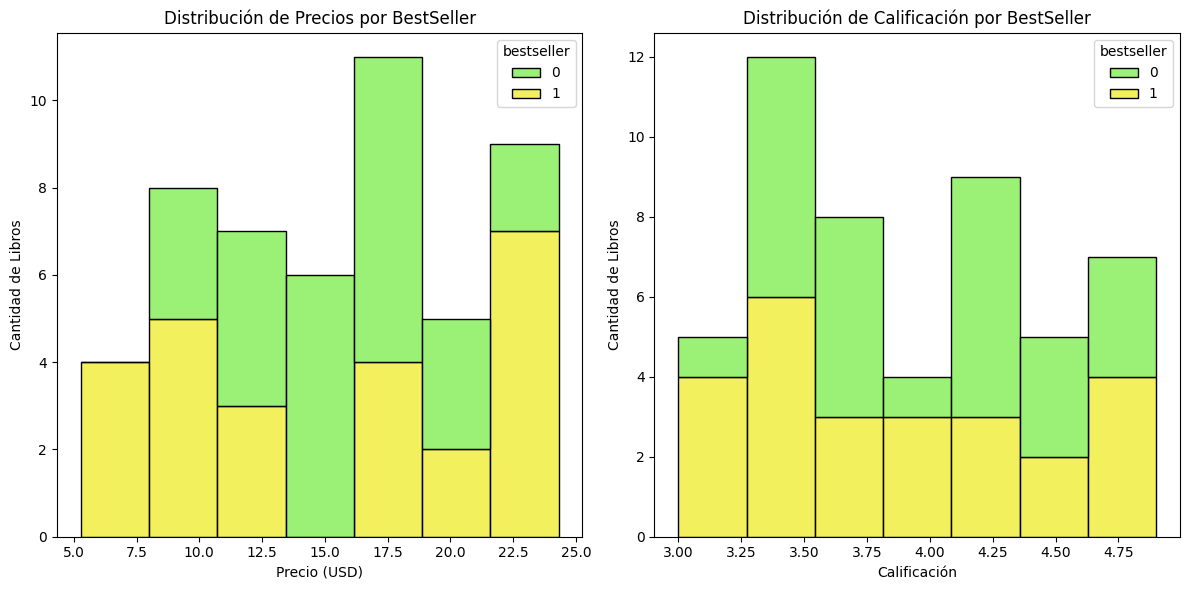

In [45]:
fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot de distribución de Precios en el primer ax
sns.histplot(
    data=df,
    x="precio",
    hue="bestseller",
    multiple="stack",
    ax=ax1
)
ax1.set_title("Distribución de Precios por BestSeller")
ax1.set_xlabel("Precio (USD)")
ax1.set_ylabel("Cantidad de Libros")

# Plot de distribución de calificaciones en el segundo ax

sns.histplot(
    data=df,
    x="calificacion",
    hue="bestseller",
    multiple="stack",
    ax=ax2
)
ax2.set_title("Distribución de Calificación por BestSeller")
ax2.set_xlabel("Calificación")
ax2.set_ylabel("Cantidad de Libros")

plt.tight_layout()

plt.show()

### Anotaciones Avanzadas: Texto Explicativo, flechas o formas a gráficos para destacar puntos de datos específicos, tendencias, o para explicar particularidades en los datos.

In [48]:
df.sort_values(by="precio", ascending=False).head()

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller,mes
46,Libro 26,Historia,24.31,3.6,102,2023-12-12,1,12
38,Libro 21,No Ficción,24.22,4.9,274,2023-10-25,0,10
43,Libro 16,No Ficción,23.53,4.4,179,2023-12-04,1,12
30,Libro 40,No Ficción,23.53,3.6,343,2023-07-27,1,7
25,Libro 42,Ficción,23.30,4.1,374,2023-06-01,1,6


In [53]:
# Libro más caro bestseller
libro_destacado = df[df["bestseller"]==1].sort_values("precio", ascending=False).iloc[0]
libro_destacado

titulo                     Libro 26
categoria                  Historia
precio                        24.31
calificacion                    3.6
ventas                          102
fecha_venta     2023-12-12 00:00:00
bestseller                        1
mes                              12
Name: 46, dtype: object

In [54]:
libro_destacado["precio"]

np.float64(24.31)

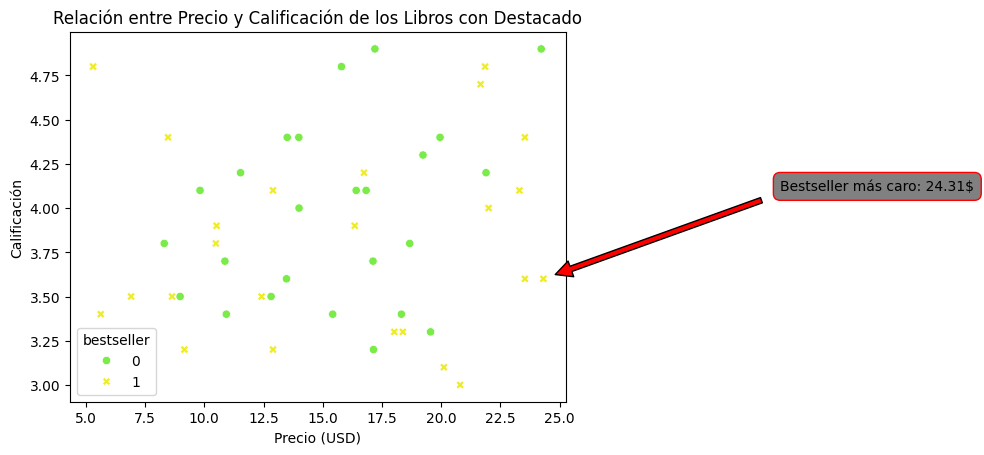

In [62]:
# Anotaciones personalizadas

sns.scatterplot(
    data=df,
    x="precio",
    y="calificacion",
    hue="bestseller",
    style="bestseller"
)

libro_destacado = df[df["bestseller"]==1].sort_values("precio", ascending=False).iloc[0]

plt.annotate(
    text=f"Bestseller más caro: {libro_destacado['precio']}$",
    xy=(libro_destacado['precio'], libro_destacado["calificacion"]), # Ubicación del Punto a destacar
    xytext=(libro_destacado["precio"]+10, libro_destacado["calificacion"]+0.5), # Ubicación del Texto con el que queremos destacar el Punto
    arrowprops=dict(facecolor='red', shrink=0.05), # Propiedades de la flecha que conecta el punto con el texto
    bbox=dict(boxstyle="round,pad=0.5", edgecolor="red", facecolor="gray") # Propiedades del cuadro que rodea al Texto
)

plt.title("Relación entre Precio y Calificación de los Libros con Destacado")
plt.xlabel("Precio (USD)")
plt.ylabel("Calificación")

plt.show()

